Trying KNeighborsClassifier - KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Got the result from ./1/predictions/KNeighborsClassifier.npy
{'classifier': 'Метод k ближайших соседей', 'Accuracy': 0.559, 'AUC-ROC': 0.8213486666666667, 'Precision': 0.5904102206697869, 'Recall': 0.5589999999999999, 'F1-score': 0.5530769791346021, 'TOP-2 Accuracy': 0.817, 'TOP-3 Accuracy': 0.9265}
Trying RandomForestClassifier - RandomForestClassifier(n_jobs=-1, random_state=42)
Got the result from ./1/predictions/RandomForestClassifier.npy
{'classifier': 'Случайный лес', 'Accuracy': 0.756, 'AUC-ROC': 0.9228905, 'Precision': 0.7553394627990646, 'Recall': 0.756, 'F1-score': 0.7552983432514073, 'TOP-2 Accuracy': 0.9035, 'TOP-3 Accuracy': 0.972}
Trying CatBoostClassifier - <catboost.core.CatBoostClassifier object at 0x000002A536D2A380>
Got the result from ./1/predictions/CatBoostClassifier.npy
{'classifier': 'CatBoost', 'Accuracy': 0.8165, 'AUC-ROC': 0.9474776666666666, 'Precision': 0.8157847780260461, 'Recall

classifier  Accuracy   AUC-ROC  Precision  \
0              Метод k ближайших соседей    0.5590  0.821349   0.590410   
1                          Случайный лес    0.7560  0.922890   0.755339   
2                               CatBoost    0.8165  0.947478   0.815785   
3  Нейронная сеть для тополог. признаков    0.7970  0.940425   0.798044   
4              ResNet50 – базовая модель    0.7840  0.925420   0.784940   
5         Комбинированная нейронная сеть    0.7820  0.927527   0.782541   

   Recall  F1-score  TOP-2 Accuracy  TOP-3 Accuracy  
0  0.5590  0.553077          0.8170          0.9265  
1  0.7560  0.755298          0.9035          0.9720  
2  0.8165  0.815333          0.9385          0.9895  
3  0.7970  0.797400          0.9300          0.9875  
4  0.7840  0.784077          0.9085          0.9760  
5  0.7820  0.782150          0.9210          0.9750

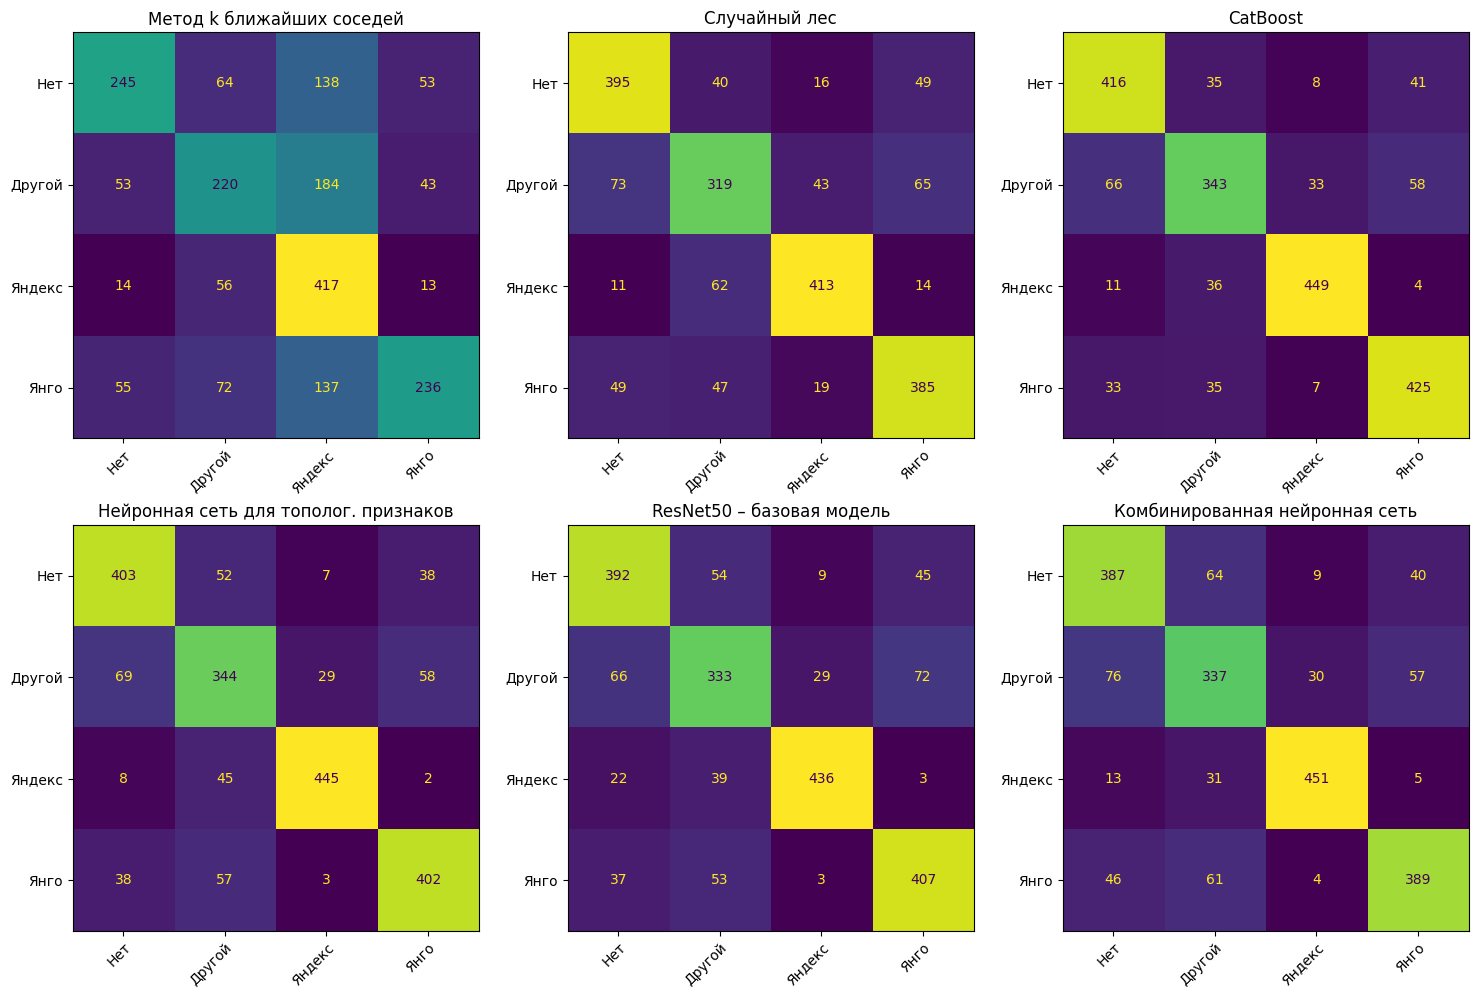

In [21]:
import numpy
import cvtda.classification

CLASSES = [ 'Нет', 'Другой', 'Яндекс', 'Янго' ]

test_labels = numpy.load("1/front/test_labels.npy")

cvtda.classification.classify(
    None, None, None, None,
    None, None, test_labels, None,
    without_diagrams = True, dump_name = "1/predictions",
    catboost_device = 'CPU', xgboost_device = 'cpu',
    only_get_from_dump = True, label_names = CLASSES
)


In [2]:
front = numpy.load("1_imgs/front/test_images.npy")
back = numpy.load("1_imgs/back/test_images.npy")
left = numpy.load("1_imgs/left/test_images.npy")
right = numpy.load("1_imgs/right/test_images.npy")

[1078 1027 1327 1361 1430 1064]
[901 896 550 947 618 755]
[1951 1837 1924 1820 1855 1859]
[731 854 607 638 203 582]


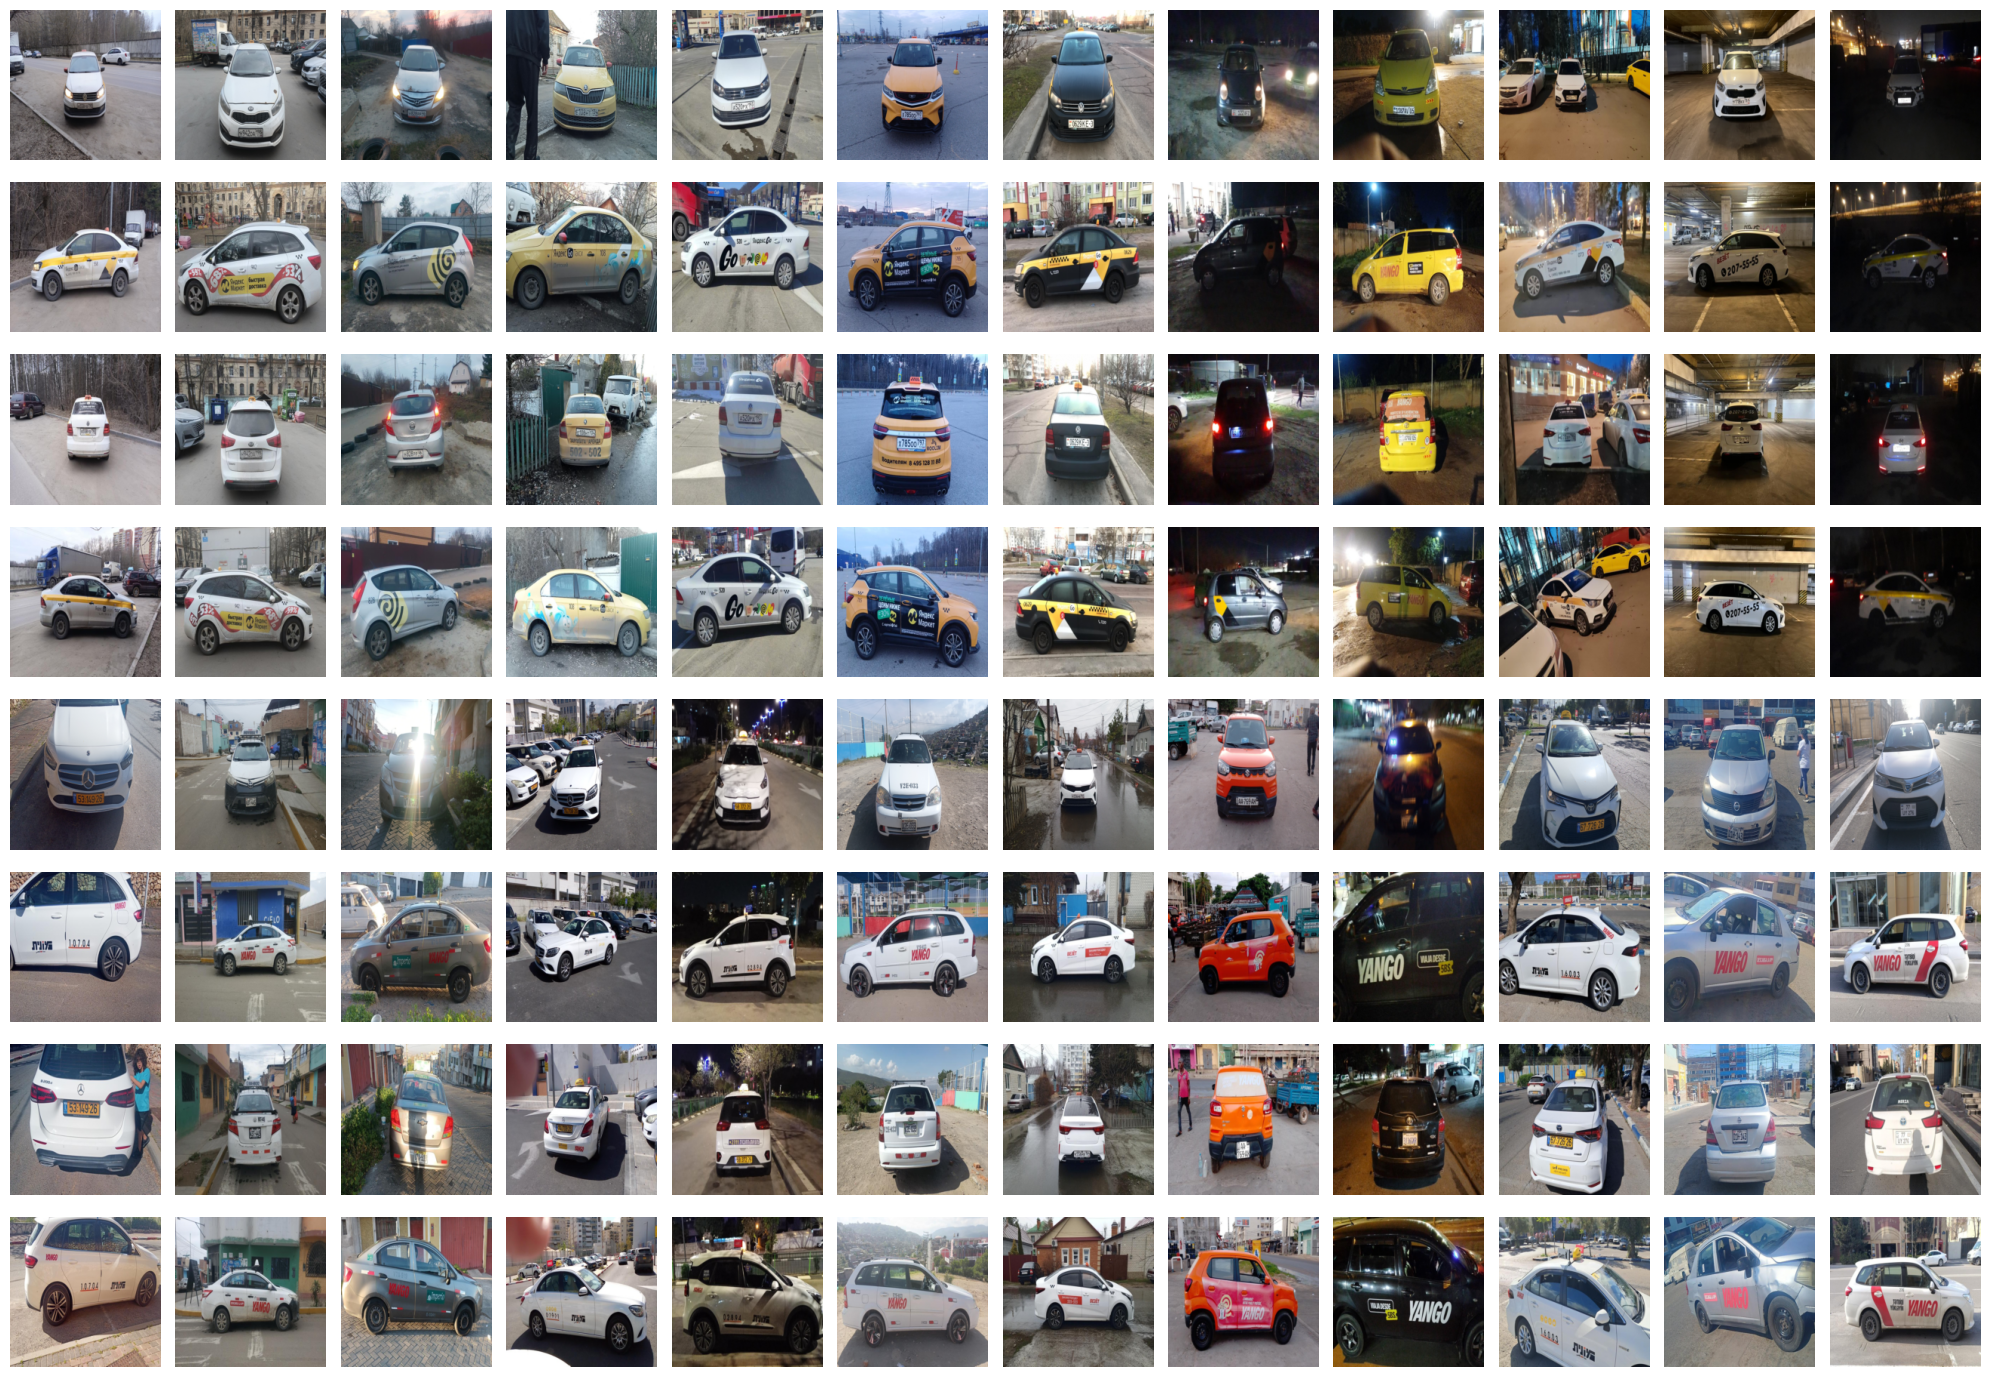

In [16]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(8, 12, figsize = (20, 14))

def draw(pred_class, target_class, i0, j0):
    numpy.random.seed(12345)
    predictions = numpy.argmax(numpy.load("1/predictions/CatBoostClassifier.npy"), axis = 1)
    imgs1 = numpy.where(numpy.isin(predictions, pred_class) & numpy.isin(test_labels, target_class))[0]

    part1 = numpy.random.choice(imgs1, size = 6, replace = False)
    assert len(numpy.unique(part1)) == 6
    print(part1)
    for i in range(6):
        axes[i0 + 0][j0 + i].imshow(front[part1[i]])
        axes[i0 + 0][j0 + i].axis(False)
        
        axes[i0 + 1][j0 + i].imshow(left[part1[i]])
        axes[i0 + 1][j0 + i].axis(False)
        
        axes[i0 + 2][j0 + i].imshow(back[part1[i]])
        axes[i0 + 2][j0 + i].axis(False)
        
        axes[i0 + 3][j0 + i].imshow(right[part1[i]])
        axes[i0 + 3][j0 + i].axis(False)

draw(1, 2, 0, 0)
draw(2, 1, 0, 6)
draw((0, 1), 3, 4, 0)
draw(3, (0, 1), 4, 6)

figure.tight_layout()

plt.savefig("1/predictions/error_examples.svg")
plt.savefig("1/predictions/error_examples.png")